In [ ]:
# Imports and configuration
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt


RAW_DIR = Path("data/raw")
PROCESSED_DIR = Path("data/processed")
PROCESSED_DIR.mkdir(parents=True, exist_ok=True)


time_col = "Time (s) Adjusted"
stim_window = (20, 40)  # seconds, inclusive
group_name_overrides = {}  # e.g., {"file1.csv": "wt"}


# Plot styling
plt.rcParams["figure.dpi"] = 120
plt.rcParams["font.family"] = "DejaVu Sans"

# Compare %dF/F0 Across Groups (VS Code)


Use this notebook locally in VS Code. It loads group CSVs from data/raw, computes mean +/- SEM over time, extracts stimulus-period peaks, and saves plots/tables to data/processed. Select the Python (ash-calcium) kernel before running.

## Data layout


- Place input CSVs in data/raw (one file per group).


- Each CSV should include a time column named `Time (s) Adjusted` plus one column per sample/neuron.
- Outputs (plots and peak tables) are written to data/processed.
- Set `group_name_overrides` below if you want nicer names than the file stems.

## How to run


1. Put your CSV files in data/raw.
2. Update the config cell (paths, stimulus window, optional name overrides).
3. Run the remaining cells in order to load data, plot mean +/- SEM, compute stimulus peaks, and save outputs to data/processed.

In [ ]:
# Load CSVs from data/raw
csv_paths = sorted(RAW_DIR.glob("*.csv"))
if not csv_paths:
    raise FileNotFoundError(f"No CSV files found in {RAW_DIR.resolve()}.")


group_data = {}


for csv_path in csv_paths:
    group_name = group_name_overrides.get(csv_path.name, csv_path.stem)
    df = pd.read_csv(csv_path)
    if time_col not in df.columns:
        raise ValueError(f"{csv_path.name} is missing the time column '{time_col}'.")
    data_columns = [c for c in df.columns if c != time_col]
    if not data_columns:
        raise ValueError(f"{csv_path.name} has no data columns besides '{time_col}'.")
    group_data[group_name] = df
    print(f"Loaded {csv_path.name} as '{group_name}' with {len(data_columns)} traces and {len(df)} time points")


print(f"Groups loaded: {list(group_data.keys())}")

Saving Group 1_wt_corrected_delta_f_f0_percentages_per_neuron_time_adjusted.csv to Group 1_wt_corrected_delta_f_f0_percentages_per_neuron_time_adjusted (1).csv
Saving Group 2_osm6p811 corrected_delta_f_f0_percentages_per_neuron_time_adjusted.csv to Group 2_osm6p811 corrected_delta_f_f0_percentages_per_neuron_time_adjusted (1).csv
Saving Group 3_osm8del_corrected_delta_f_f0_percentages_per_neuron_time_adjusted.csv to Group 3_osm8del_corrected_delta_f_f0_percentages_per_neuron_time_adjusted (1).csv
Please provide a descriptive name for each uploaded file (group):
Enter a descriptive name for 'Group 1_wt_corrected_delta_f_f0_percentages_per_neuron_time_adjusted (1).csv': wt
Uploaded and processed data for group: Group 1_wt_corrected_delta_f_f0_percentages_per_neuron_time_adjusted (1).csv (will be referred to as 'wt')
Enter a descriptive name for 'Group 2_osm6p811 corrected_delta_f_f0_percentages_per_neuron_time_adjusted (1).csv': osm-6
Uploaded and processed data for group: Group 2_osm6p8

,Time (s) Adjusted,Corrected_DeltaF/F0_%_1,Corrected_DeltaF/F0_%_2,Corrected_DeltaF/F0_%_3,Corrected_DeltaF/F0_%_4,Corrected_DeltaF/F0_%_5,Corrected_DeltaF/F0_%_6,Corrected_DeltaF/F0_%_7,Corrected_DeltaF/F0_%_8,Corrected_DeltaF/F0_%_9,Corrected_DeltaF/F0_%_10,Corrected_DeltaF/F0_%_11,Corrected_DeltaF/F0_%_12,Corrected_DeltaF/F0_%_13,Corrected_DeltaF/F0_%_14,Corrected_DeltaF/F0_%_15,Corrected_DeltaF/F0_%_16,Corrected_DeltaF/F0_%_17
0,0.0,-12.624249,-0.632811,-0.303517,-3.134681,-5.548926,0.523522,0.316020,-5.002574,-28.319063,-4.751570,-4.525013,-1.824862,-14.193928,-2.200652,1.631810,-7.273305,1.463755
1,0.1,-12.503101,-0.709343,-0.077315,-2.868992,-5.706044,-0.371299,0.679835,-5.654558,-28.382151,-3.550608,-4.021450,-1.688096,-13.476267,-2.314041,1.615376,-6.689968,1.458123
2,0.2,-12.309226,-0.465800,0.068748,-2.969704,-3.210258,-0.405065,0.875419,-5.447545,-28.324288,-2.871670,-4.286957,-1.151047,-13.583769,-2.342093,1.402168,-6.339192,1.660358
3,0.3,-11.895341,-0.305829,0.094306,-2.784167,-4.150766,-0.543225,1.102974,-5.140532,-27.497410,-1.966238,-4.195636,-1.018112,-13.505332,-2.227011,1.367557,-6.065466,1.276284
4,0.4,-11.478927,-0.375984,0.005228,-2.518489,-3.229009,-0.296437,1.421642,-6.092702,-26.573469,-1.141066,-4.064176,-1.180236,-9.832025,-2.315505,1.436326,-5.487659,0.899626


Group 'osm-6': 12 samples, 501 time points


,Time (s) Adjusted,Corrected_DeltaF/F0_%_1,Corrected_DeltaF/F0_%_2,Corrected_DeltaF/F0_%_3,Corrected_DeltaF/F0_%_4,Corrected_DeltaF/F0_%_5,Corrected_DeltaF/F0_%_6,Corrected_DeltaF/F0_%_7,Corrected_DeltaF/F0_%_8,Corrected_DeltaF/F0_%_9,Corrected_DeltaF/F0_%_10,Corrected_DeltaF/F0_%_11,Corrected_DeltaF/F0_%_12
0,0.0,-2.910084,-2.904500,2.688170,-1.420046,-2.207767,-7.202913,-8.030159,-7.295758,-1.050082,-6.690076,-1.587190,-1.657707
1,0.1,-2.535194,-4.390337,1.146748,-1.125692,-2.612021,-8.727338,-7.858525,-6.548538,-2.158953,-6.254114,-1.326037,-2.082779
2,0.2,-1.805731,-3.056815,1.488430,-2.235121,-2.676476,-8.736482,-7.036168,-6.467067,-0.228129,-5.549391,-1.504948,-1.997256
3,0.3,-3.054004,-3.039965,1.065263,-1.908928,-3.087878,-5.861937,-6.646384,-5.965043,-0.861191,-5.634663,-1.906150,-1.814796
4,0.4,-2.804584,-2.447974,2.241272,-0.020003,-1.980914,-7.253990,-6.002986,-7.103518,-0.755716,-4.006696,-1.672821,-1.663556


Group 'osm-8': 15 samples, 501 time points


,Time (s) Adjusted,Corrected_DeltaF/F0_%_1,Corrected_DeltaF/F0_%_2,Corrected_DeltaF/F0_%_3,Corrected_DeltaF/F0_%_4,Corrected_DeltaF/F0_%_5,Corrected_DeltaF/F0_%_6,Corrected_DeltaF/F0_%_7,Corrected_DeltaF/F0_%_8,Corrected_DeltaF/F0_%_9,Corrected_DeltaF/F0_%_10,Corrected_DeltaF/F0_%_11,Corrected_DeltaF/F0_%_12,Corrected_DeltaF/F0_%_13,Corrected_DeltaF/F0_%_14,Corrected_DeltaF/F0_%_15
0,0.0,-0.566344,-7.524944,-4.206852,-0.788766,0.375205,1.353264,-0.935775,-12.935680,-3.548386,-5.409540,3.912122,-1.240033,-1.865347,-4.941574,-4.151105
1,0.1,-0.330236,-8.060646,-3.823703,-0.424460,0.427952,1.537759,1.931409,-10.510698,-3.143229,-5.061386,3.749219,-1.879529,-2.942542,-4.885186,-3.335726
2,0.2,-0.684238,-7.904258,-4.002117,-0.435659,-0.218157,0.826962,2.097475,-9.946524,-2.504724,-4.653733,2.976880,-2.084527,-2.662106,-4.895898,-2.338003
3,0.3,-0.508455,-7.865759,-3.755490,-0.285493,-0.002795,1.488143,2.318005,-9.461800,-2.168482,-3.350913,2.839651,-2.294051,-2.070908,-5.077748,-2.238080
4,0.4,-0.382123,-10.880584,-3.752549,-0.695002,0.070690,1.569689,2.339661,-10.008884,-1.726874,-3.914585,2.481865,-3.368963,-2.009634,-4.216555,-2.045805


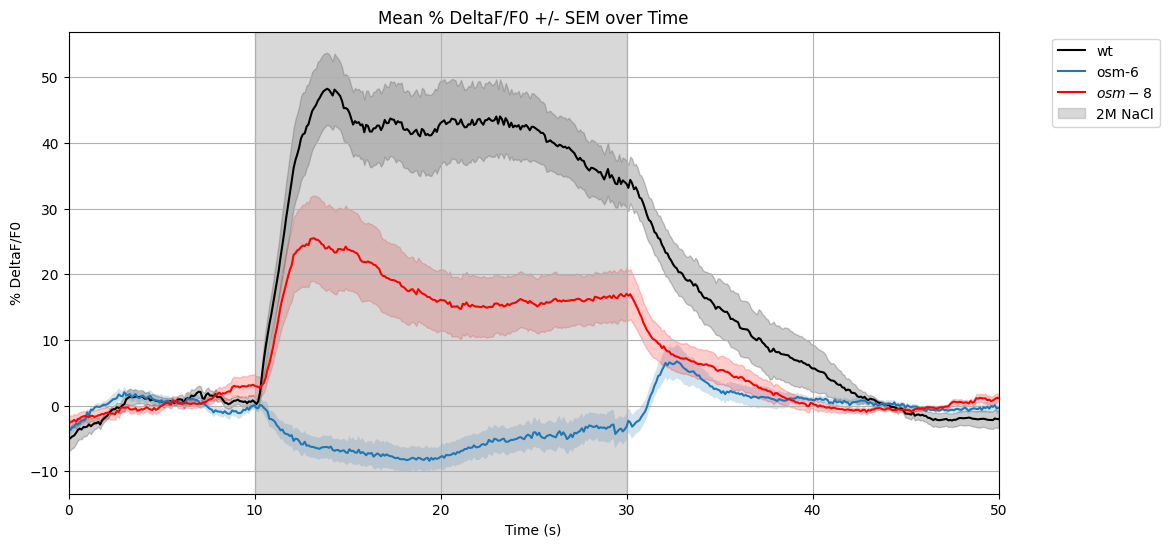

In [ ]:
# Compute mean/SEM and plot time series
group_stats = {}
for name, df in group_data.items():
    data_cols = [c for c in df.columns if c != time_col]
    group_stats[name] = {
        "time": df[time_col],
        "mean": df[data_cols].mean(axis=1),
        "sem": df[data_cols].sem(axis=1),
    }


palette = {"wt": "black", "osm-8": "red", "osm-6": "blue"}


fig, ax = plt.subplots(figsize=(10, 5))
for name, stats in group_stats.items():
    color = palette.get(name)
    ax.plot(stats["time"], stats["mean"], label=name, color=color)
    ax.fill_between(stats["time"], stats["mean"] - stats["sem"], stats["mean"] + stats["sem"], alpha=0.2, color=color)


ax.set_xlabel("Time (s)")
ax.set_ylabel("% dF/F0")
ax.set_title("Mean % dF/F0 +/- SEM over time")
ax.grid(True, alpha=0.4)


# Stimulus shading
ax.axvspan(stim_window[0], stim_window[1], color="gray", alpha=0.15, label="Stimulus")


ax.legend(bbox_to_anchor=(1.02, 1), loc="upper left")


out_path = PROCESSED_DIR / "mean_deltaF_F0_over_time.png"
fig.tight_layout()
fig.savefig(out_path, dpi=300)
print(f"Saved {out_path}")


plt.show()

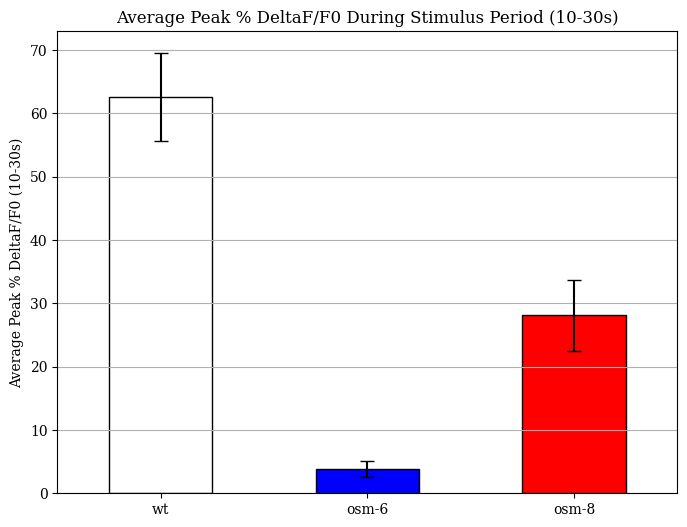

One-way ANOVA results (on average peak values):
  F-statistic: 32.1276
  P-value: 0.0000

One-way ANOVA is significant, performing Tukey's HSD post-hoc test (on average peak values).
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
 osm-6  osm-8  24.2949 0.0064  6.2288 42.3611   True
 osm-6     wt  58.7268    0.0 40.6606  76.793   True
 osm-8     wt  34.4318 0.0001 16.3657  52.498   True
----------------------------------------------------


In [ ]:
# Extract stimulus-period peaks and plot bar chart
peak_frames = []
for name, df in group_data.items():
    window = df[(df[time_col] >= stim_window[0]) & (df[time_col] <= stim_window[1])]
    data_cols = [c for c in df.columns if c != time_col]
    peaks = window[data_cols].max()
    peaks.name = name
    peak_frames.append(peaks)


peak_df = pd.concat(peak_frames, axis=1)
mean_peak = peak_df.mean()
sem_peak = peak_df.sem()


fig, ax = plt.subplots(figsize=(6, 4))
ax.bar(mean_peak.index, mean_peak.values, yerr=sem_peak.values, capsize=5, color="white", edgecolor="black")
ax.set_ylabel("Peak % dF/F0 (stim window)")
ax.set_title(f"Peak % dF/F0 during {stim_window[0]}-{stim_window[1]} s")
ax.grid(axis="y", alpha=0.4)
fig.tight_layout()


bar_path = PROCESSED_DIR / "peak_deltaF_F0_bar.png"
fig.savefig(bar_path, dpi=300)
print(f"Saved {bar_path}")


peaks_path = PROCESSED_DIR / "peak_deltaF_F0_values.csv"
peak_df.T.to_csv(peaks_path)
print(f"Saved {peaks_path}")


plt.show()

In [ ]:
# List generated outputs
for path in sorted(PROCESSED_DIR.glob("*")):
    size_kb = path.stat().st_size / 1024
    print(f"{path.name} ({size_kb:.1f} KB)")

Raw peak values for individual neurons exported to 'raw_peak_values_individual_neurons.csv'


In [ ]:
# Optional: export mean and SEM time series per group
for name, stats in group_stats.items():
    export_df = pd.DataFrame({
        "time_s": stats["time"],
        "mean_percent_dF_F0": stats["mean"],
        "sem_percent_dF_F0": stats["sem"],
    })
    out_file = PROCESSED_DIR / f"{name}_mean_sem.csv"
    export_df.to_csv(out_file, index=False)
    print(f"Saved {out_file}")

Added mean_deltaF_F0_plot.tiff to neuronal_gcmap_analysis_results.zip
Added average_peak_value_bar_plot.tiff to neuronal_gcmap_analysis_results.zip
Added raw_peak_values_individual_neurons.csv to neuronal_gcmap_analysis_results.zip

Zip file 'neuronal_gcmap_analysis_results.zip' created successfully.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
## Notes and next steps


- Drop new input CSVs into data/raw and rerun the notebook.
- Adjust `stim_window` or `group_name_overrides` in the config cell as needed.
- Outputs land in data/processed; add them to version control if you want to keep generated results.